In [0]:
# импорт библиотек
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt

In [0]:
# расстояние между точками (u, v) и (x, y)
def distance(u, v, x, y):
  return math.sqrt((u - x) ** 2 + (v - y) ** 2)

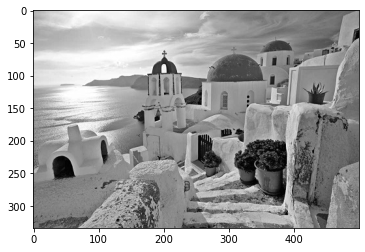

In [168]:
# шаг 0.1: загрузка изображения
image = cv2.imread('greece.jpg', cv2.IMREAD_GRAYSCALE)
rows, cols = image.shape
plt.imshow(image, cmap='gray')

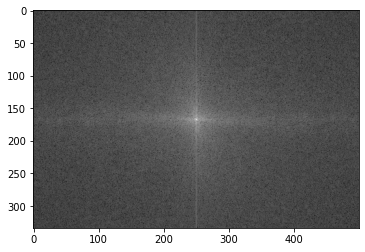

In [169]:
# шаг 0.2: выполняем преобразование Фурье, отображаем спектр
spec = np.fft.fft2(img)
spec = np.fft.fftshift(spec)
mag_spec = np.abs(spec) ** 0.05
plt.imshow(mag_spec, cmap = 'gray')

In [0]:
# шаг 0.3: задаём диаметр круга в фильтрах и показатель в фильтре Баттерворта
D = 30
n = 4

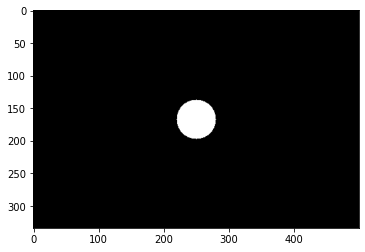

In [171]:
# шаг 1.1: получаем идеальный низкочастотный фильтр
filter = np.zeros((rows, cols), np.float32)
for u in range(rows):
  for v in range(cols):
    if distance(u, v, rows / 2, cols / 2) <= D:
      filter[u][v] = 1
mag_spec = np.abs(filter) ** 0.05
plt.imshow(mag_spec, cmap = 'gray')

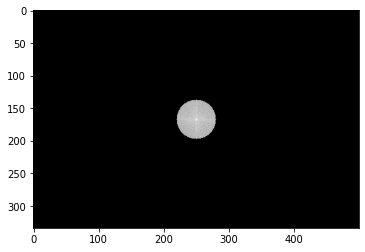

In [172]:
# шаг 1.2: применяем идеальный низкочастотный фильтр к спектру
new_spec = spec * filter
mag_spec = np.abs(new_spec) ** 0.05
plt.imshow(mag_spec, cmap = 'gray')

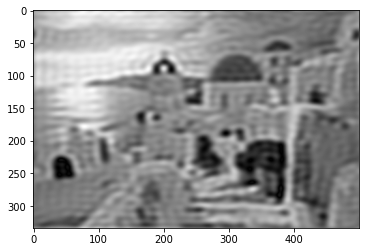

In [173]:
# шаг 1.3: выводим полученное изображение
new_image = np.fft.ifftshift(new_spec)
new_image = np.fft.ifft2(new_image)
new_image = np.abs(new_image)
plt.imshow(new_image, cmap = 'gray')

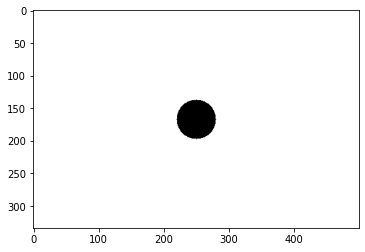

In [174]:
# шаг 1.4: получаем идеальный высокочастотный фильтр
filter = np.zeros((rows, cols), np.float32)
for u in range(rows):
  for v in range(cols):
    if distance(u, v, rows / 2, cols / 2) > D:
      filter[u][v] = 1
mag_spec = np.abs(filter) ** 0.05
plt.imshow(mag_spec, cmap = 'gray')

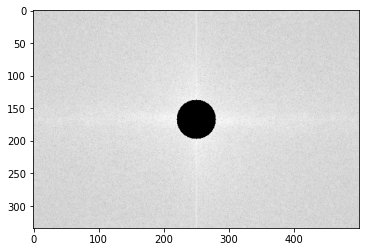

In [175]:
# шаг 1.5: применяем идеальный высокочастотный фильтр к спектру
new_spec = spec * filter
mag_spec = np.abs(new_spec) ** 0.05
plt.imshow(mag_spec, cmap = 'gray')

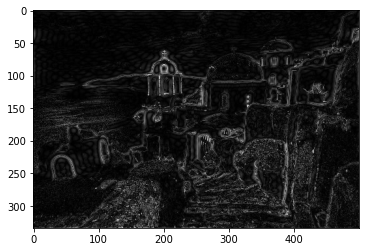

In [176]:
# шаг 1.6: выводим полученное изображение
new_image = np.fft.ifftshift(new_spec)
new_image = np.fft.ifft2(new_image)
new_image = np.abs(new_image)
plt.imshow(new_image, cmap = 'gray')

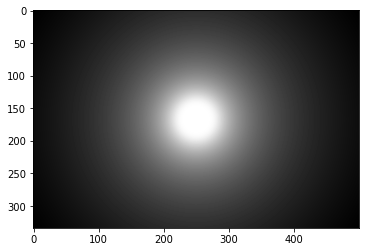

In [181]:
# шаг 2.1: получаем низкочастотный фильтр Баттерворта
filter = np.zeros((rows, cols), np.float32)
for u in range(rows):
  for v in range(cols):
    filter[u][v] = 1 / (1 + (distance(u, v, rows / 2, cols / 2) / D) ** (2 * n))
mag_spec = np.abs(filter) ** 0.05
plt.imshow(mag_spec, cmap = 'gray')

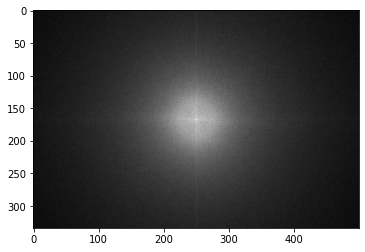

In [182]:
# шаг 2.2: применяем низкочастотный фильтр Баттерворта к спектру
new_spec = spec * filter
mag_spec = np.abs(new_spec) ** 0.05
plt.imshow(mag_spec, cmap = 'gray')

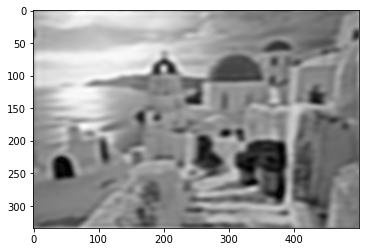

In [183]:
# шаг 2.3: выводим полученное изображение
new_image = np.fft.ifftshift(new_spec)
new_image = np.fft.ifft2(new_image)
new_image = np.abs(new_image)
plt.imshow(new_image, cmap = 'gray')

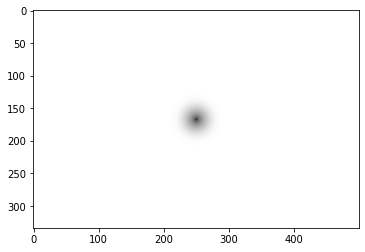

In [184]:
# шаг 2.4: получаем высокочастотный фильтр Баттерворта
filter = np.zeros((rows, cols), np.float32)
for u in range(rows):
  for v in range(cols):
    filter[u][v] = 1 - 1 / (1 + (distance(u, v, rows / 2, cols / 2) / D) ** (2 * n))
mag_spec = np.abs(filter) ** 0.05
plt.imshow(mag_spec, cmap = 'gray')

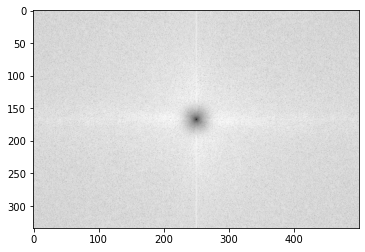

In [185]:
# шаг 2.5: применяем высокочастотный фильтр Баттерворта к спектру
new_spec = spec * filter
mag_spec = np.abs(new_spec) ** 0.05
plt.imshow(mag_spec, cmap = 'gray')

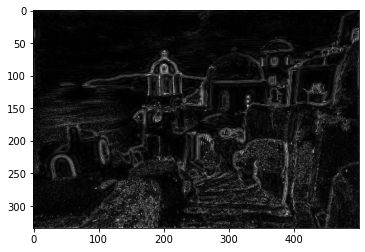

In [186]:
# шаг 2.6: выводим полученное изображение
new_image = np.fft.ifftshift(new_spec)
new_image = np.fft.ifft2(new_image)
new_image = np.abs(new_image)
plt.imshow(new_image, cmap = 'gray')

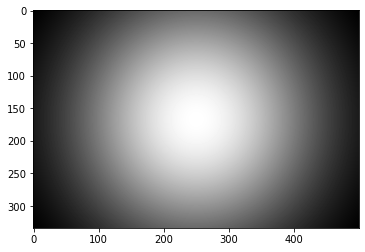

In [190]:
# шаг 3.1: получаем низкочастотный фильтр Гаусса
filter = np.zeros((rows, cols), np.float32)
for u in range(rows):
  for v in range(cols):
    filter[u][v] = math.exp(-(distance(u, v, rows / 2, cols / 2) ** 2) / 2 / (D ** 2)) 
mag_spec = np.abs(filter) ** 0.05
plt.imshow(mag_spec, cmap = 'gray')

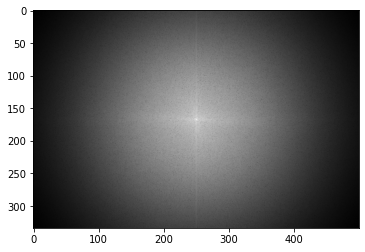

In [191]:
# шаг 3.2: применяем низкочастотный фильтр Гаусса к спектру
new_spec = spec * filter
mag_spec = np.abs(new_spec) ** 0.05
plt.imshow(mag_spec, cmap = 'gray')

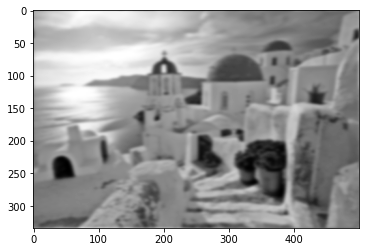

In [192]:
# шаг 3.3: выводим полученное изображение
new_image = np.fft.ifftshift(new_spec)
new_image = np.fft.ifft2(new_image)
new_image = np.abs(new_image)
plt.imshow(new_image, cmap = 'gray')

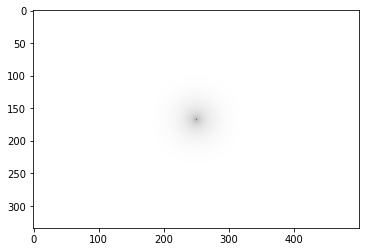

In [193]:
# шаг 3.4: получаем высокочастотный фильтр Гаусса
filter = np.zeros((rows, cols), np.float32)
for u in range(rows):
  for v in range(cols):
    filter[u][v] = 1 - math.exp(-(distance(u, v, rows / 2, cols / 2) ** 2) / 2 / (D ** 2))
mag_spec = np.abs(filter) ** 0.05
plt.imshow(mag_spec, cmap = 'gray')

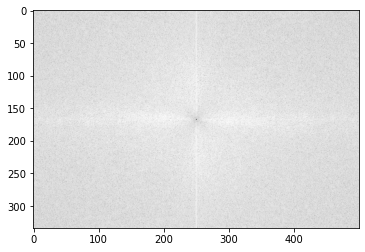

In [194]:
# шаг 3.5: применяем высокочастотный фильтр Гаусса к спектру
new_spec = spec * filter
mag_spec = np.abs(new_spec) ** 0.05
plt.imshow(mag_spec, cmap = 'gray')

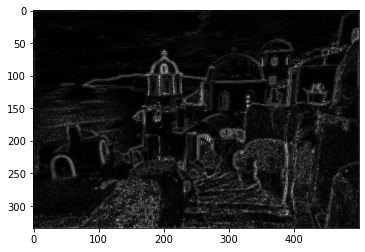

In [195]:
# шаг 3.6: выводим полученное изображение
new_image = np.fft.ifftshift(new_spec)
new_image = np.fft.ifft2(new_image)
new_image = np.abs(new_image)
plt.imshow(new_image, cmap = 'gray')